In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv(r"C:\Users\maste\Desktop\data analyst\placementdata.csv")

In [3]:
df

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,1,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced
1,2,8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed
2,3,7.3,1,2,2,82,4.8,Yes,No,79,80,NotPlaced
3,4,7.5,1,1,2,85,4.4,Yes,Yes,81,80,Placed
4,5,8.3,1,2,2,86,4.5,Yes,Yes,74,88,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,7.5,1,1,2,72,3.9,Yes,No,85,66,NotPlaced
9996,9997,7.4,0,1,0,90,4.8,No,No,84,67,Placed
9997,9998,8.4,1,3,0,70,4.8,Yes,Yes,79,81,Placed
9998,9999,8.9,0,3,2,87,4.8,Yes,Yes,71,85,Placed


In [8]:
df["value"]=df["PlacementStatus"].apply(lambda x: 1 if x=="Placed" else 0)
df

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus,value
0,1,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced,0
1,2,8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed,1
2,3,7.3,1,2,2,82,4.8,Yes,No,79,80,NotPlaced,0
3,4,7.5,1,1,2,85,4.4,Yes,Yes,81,80,Placed,1
4,5,8.3,1,2,2,86,4.5,Yes,Yes,74,88,Placed,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,7.5,1,1,2,72,3.9,Yes,No,85,66,NotPlaced,0
9996,9997,7.4,0,1,0,90,4.8,No,No,84,67,Placed,1
9997,9998,8.4,1,3,0,70,4.8,Yes,Yes,79,81,Placed,1
9998,9999,8.9,0,3,2,87,4.8,Yes,Yes,71,85,Placed,1


<Axes: xlabel='Internships'>

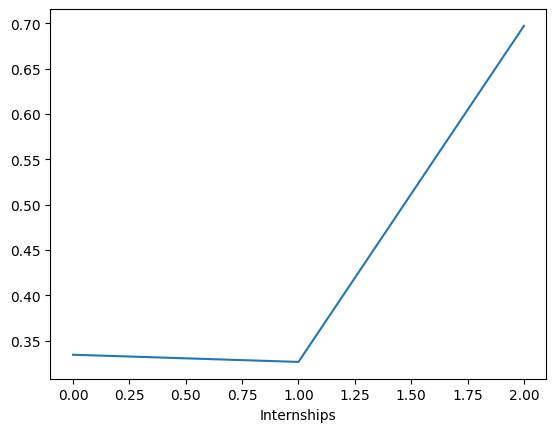

In [30]:
'''df.groupby("Internships")["value"].mean().plot(kind="line")
plt.xlabel("Number of Internship")
plt.ylabel("Placement Probability")
plt.show()'''
df_grouped=df.groupby("Internships")["value"].mean()
d2=df_grouped
d2.plot(kind="line")



In [43]:
df["df_training"]=df["PlacementTraining"].apply(lambda x: 0 if x=="No" else 1)


Creating a small model for finding out the probabilty

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = df[["Projects", "Internships", "CGPA","df_training"]]  # Select important features
y = df["value"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)
print("Accuracy:", model.score(X_test, y_test))


Accuracy: 0.769


TESTING THE MODEL WITH MAX AND MIN VALUES OF OUR TRAINED DATA
For example the max internship and max projects are 3 
and also checking for least values from our trained data

In [52]:
import numpy as np


new_input = np.array([[3,3,10,1]])  # (Projects, Internships, CGPA)
n2=np.array([[2,2,8,0]])

placement_probability = model.predict_proba(new_input)
placement_probability2 = model.predict_proba(n2)

print("Probability of Placement:", placement_probability[0][1]) 
print("Probability of Placement2:", placement_probability2[0][1])  # Probability of getting placed


Probability of Placement: 0.972721449112665
Probability of Placement2: 0.30353859069770933


c:\Users\maste\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\maste\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
